In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import joblib  

In [2]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
# Train a basic Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate Performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### Hyperparameter Tuning ( Grid Search )

In [4]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 10, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples needed for a split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


C:\Users\sunny\AppData\Local\Temp\ipykernel_27868\612659797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


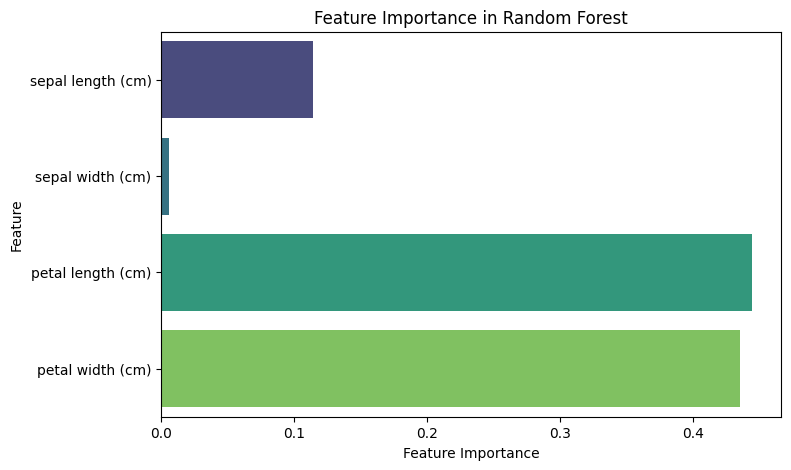

In [5]:
# Get feature importances
importances = best_rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions using the best model
y_pred_best = best_rf.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



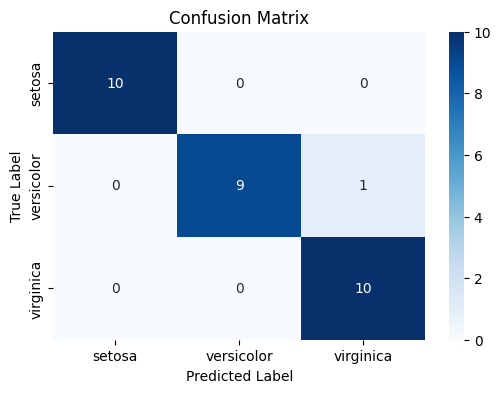

In [9]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9697
Recall: 0.9667
F1 Score: 0.9666


In [11]:
import joblib

# Save the trained model
joblib.dump(best_rf, "random_forest_model.pkl")

# Load the model
loaded_rf = joblib.load("random_forest_model.pkl")

# Make predictions with the loaded model
y_pred_loaded = loaded_rf.predict(X_test)
print(f"Loaded Model Accuracy: {accuracy_score(y_test, y_pred_loaded):.4f}")


Loaded Model Accuracy: 0.9667


In [12]:
# Example new data point (using an unseen flower)
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Feature values
predicted_class = loaded_rf.predict(new_sample)
print(f"Predicted Class: {target_names[predicted_class[0]]}")


Predicted Class: setosa
